In [0]:
!pip install scikit-plot

In [0]:
#!/usr/bin/env python
# coding: utf-8

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#y_train_ohe = ohe.fit_transform(y_train)
# Encoding training dataset

In [0]:
df= pd.read_csv("train.csv")

In [0]:
dx = pd.DataFrame(df.drop(['Activity','subject'],axis=1))
dy_label = df.Activity.values.astype(object)

In [0]:
from sklearn import linear_model
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [0]:
# encoding train labels 
encoder.fit(dy_label)
dy = encoder.transform(dy_label)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dx,dy,test_size=0.2, random_state=4)

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 512, activation = 'relu', input_dim = 561))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 512, activation = 'relu'))
#classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))


In [0]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [0]:
from keras.utils import to_categorical
Y_test = to_categorical(Y_test)

Y_train = to_categorical(Y_train)

In [0]:
hist=classifier.fit(X_train, Y_train, batch_size=350, epochs = 100, validation_data=(X_test,Y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5881 samples, validate on 1471 samples
Epoch 1/100





5881/5881 [==============================] - 2s 342us/step - loss: 0.5855 - acc: 0.7441 - val_loss: 0.2180 - val_acc: 0.9096
Epoch 2/100
5881/5881 [==============================] - 1s 187us/step - loss: 0.1293 - acc: 0.9449 - val_loss: 0.1417 - val_acc: 0.9449
Epoch 3/100
5881/5881 [==============================] - 1s 185us/step - loss: 0.0668 - acc: 0.9740 - val_loss: 0.0736 - val_acc: 0.9708
Epoch 4/100
5881/5881 [==============================] - 1s 182us/step - loss: 0.0428 - acc: 0.9827 - val_loss: 0.0802 - val_acc: 0.9708
Epoch 5/100
5881/5881 [==============================] - 1s 189us/step - loss: 0.0418 - acc: 0.9832 - val_loss: 0.0866 - val_acc: 0.9694
Epoch 6/100
5881/5881 [==============================] - 1s 184us/step - loss: 0.0429 - acc: 0.9827 - val_loss: 0.0644 - val_acc: 0.9782
Epoch 7/100
5881/5881 [=====

In [0]:
y_pred = classifier.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(y_pred)

[[1.00000000e+00 1.34997395e-11 5.25155788e-28 9.04650730e-20
  3.24353674e-19 7.99219840e-20]
 [1.93261900e-12 1.52526686e-10 2.32973016e-12 5.89750904e-12
  1.06855297e-11 1.00000000e+00]
 [1.00000000e+00 7.82367504e-10 4.16825614e-23 1.27294917e-16
  1.05066450e-16 1.46152147e-16]
 ...
 [1.00000000e+00 2.07558482e-09 1.42809825e-20 6.15403656e-15
  7.68985383e-15 3.63166774e-15]
 [1.03457538e-11 4.58764157e-13 1.96119912e-10 1.00000000e+00
  1.70205065e-11 4.27671128e-11]
 [5.25340080e-13 2.80719191e-15 7.50983276e-10 1.00000000e+00
  4.72692632e-13 1.78463808e-12]]
[[ True False False False False False]
 [False False False False False  True]
 [ True False False False False False]
 ...
 [ True False False False False False]
 [False False False  True False False]
 [False False False  True False False]]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)


[[262   0   0   0   0   0]
 [  1 277   6   0   0   0]
 [  0  12 264   0   0   0]
 [  0   0   0 239   0   1]
 [  0   0   0   0 177   1]
 [  0   0   0   0   0 231]]


In [0]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, y_pred)*100,'%')
#print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')
print(classification_report(Y_test,y_pred))

98.57239972807615 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.96      0.98      0.97       284
           2       0.98      0.96      0.97       276
           3       1.00      1.00      1.00       240
           4       1.00      0.99      1.00       178
           5       0.99      1.00      1.00       231

   micro avg       0.99      0.99      0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471
 samples avg       0.99      0.99      0.99      1471



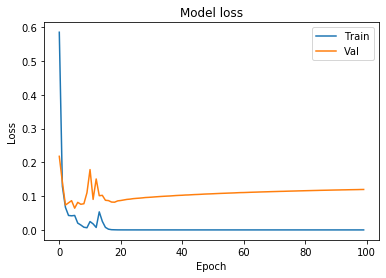

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()



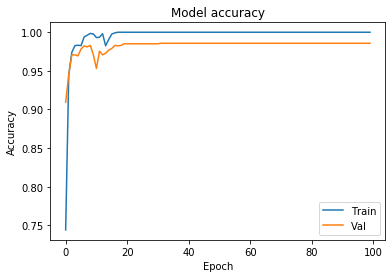

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()



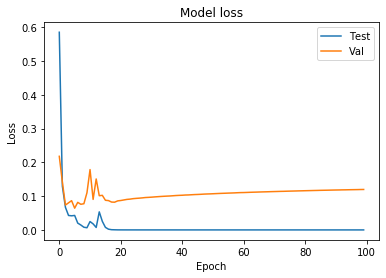

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Val'], loc='upper right')
plt.show()

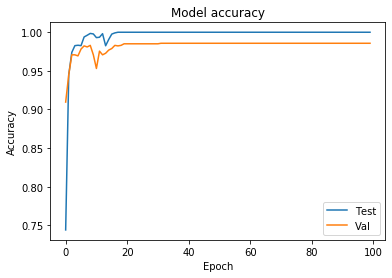

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Val'], loc='lower right')
plt.show()



In [0]:
import tensorflow as tf

In [0]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [0]:
model = get_compiled_model()
model.fit(, epochs=10)

(5881, 561)